In [48]:
import random, math
import pandas as pd
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('ggplot')

In [49]:
def plotDecisionBoundary(model, X, y):

    fig = plt.figure()
    ax = fig.add_subplot(111)

    padding = 0.1
    resolution = 0.0025

    colors = {0:'royalblue', 1:'lightsalmon'} 


    # Calculate the boundaris
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()
    x_range = x_max - x_min
    y_range = y_max - y_min
    x_min -= x_range * padding
    y_min -= y_range * padding
    x_max += x_range * padding
    y_max += y_range * padding

    # Create a 2D Grid Matrix. The values stored in the matrix
    # are the predictions of the class at at said location
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))

    # What class does the classifier say?
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour map
    plt.contourf(xx, yy, Z, cmap=plt.cm.seismic)
    plt.axis('tight')

    # Plot your testing points as well...
    for label in np.unique(y):
        indices = np.where(y == label)
        plt.scatter(X[indices, 0], X[indices, 1], c=colors[label], alpha=0.8)

    p = model.get_params()
    plt.title('K = ' + str(p['n_neighbors']))
    plt.show()

In [50]:
X = pd.read_csv('/home/shubham/diabetes/diabetes.csv')
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [51]:
display(X.columns)
X.dtypes

Index([u'Pregnancies', u'Glucose', u'BloodPressure', u'SkinThickness',
       u'Insulin', u'BMI', u'Pedigree', u'Age', u'Outcome'],
      dtype='object')

Pregnancies        int64
Glucose            int64
BloodPressure      int64
SkinThickness      int64
Insulin            int64
BMI              float64
Pedigree         float64
Age                int64
Outcome            int64
dtype: object

In [52]:
X[X.isnull().any(axis=1)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome


In [53]:
class_counts = X.groupby('Outcome').size()
class_counts

Outcome
0    500
1    268
dtype: int64

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
Pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


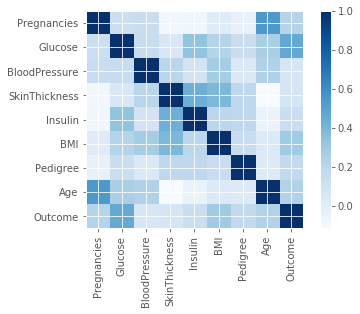

In [54]:
correlations = X.corr(method='pearson')
display(correlations)
plt.imshow(correlations, cmap=plt.cm.Blues, interpolation='nearest')
plt.colorbar()
tick_marks = [i for i in range(len(X.columns))]
plt.xticks(tick_marks, X.columns, rotation='vertical')
plt.yticks(tick_marks, X.columns)
plt.show()

In [55]:
y = X['Outcome'].copy()
X = X.drop('Outcome',axis=1)
display(X.head())
y.head()
X.dtypes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


Pregnancies        int64
Glucose            int64
BloodPressure      int64
SkinThickness      int64
Insulin            int64
BMI              float64
Pedigree         float64
Age                int64
dtype: object

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((514, 8), (254, 8), (514,), (254,))

In [57]:
from sklearn.preprocessing import Normalizer, MaxAbsScaler, MinMaxScaler, StandardScaler, RobustScaler

norm = Normalizer().fit(X_train)

X_train = norm.transform(X_train)
X_test = norm.transform(X_test)

In [58]:
model = None
Test_PCA = True
if Test_PCA:
    print('Computing 2D Principle Components')
    from sklearn.decomposition import PCA
    model = PCA(n_components=2)
    model.fit(X_train)

else:
    print('Computing 2D Isomap Manifold')
    from sklearn.manifold import Isomap
    model = Isomap(n_neighbors=5, n_components=2)
    model.fit(X_train)

Computing 2D Principle Components


In [59]:
X_train = model.transform(X_train)
X_test = model.transform(X_test)

In [60]:
from sklearn.neighbors import KNeighborsClassifier
knmodel = KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree')
knmodel.fit(X_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

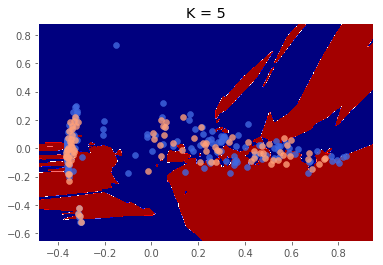

In [61]:
plotDecisionBoundary(knmodel, X_train, y_test)

In [62]:
accuracy_score = knmodel.score(X_test, y_test)
print(accuracy_score)

0.586614173228


In [63]:
var = [[6,148,72,35,0,33.6,0.627,50]]
var_pre = norm.transform(var)
var_trans = model.transform(var_pre)
ans = knmodel.predict_proba(var_trans)
print 'probability of having diabetes is: ' + str(ans[0][1])
print 'probability of not having diabetes is: ' + str(ans[0][0])

probability of having diabetes is: 0.6
probability of not having diabetes is: 0.4
